# Import libraries

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Import images

In [61]:
mamo1_path = rf'Imágenes necesarias/Mamo1.png'
mamo2_path = rf'Imágenes necesarias/Mamo2.png'


mamo_1 = cv2.imread(mamo1_path,0)
mamo_2 = cv2.imread(mamo2_path,0)

In [62]:
print(len(mamo_1.shape), len(mamo_2.shape))

2 2


Tienen shape de largo 2, lo que implica que son monocromas

# 1) Basic viz y descripción

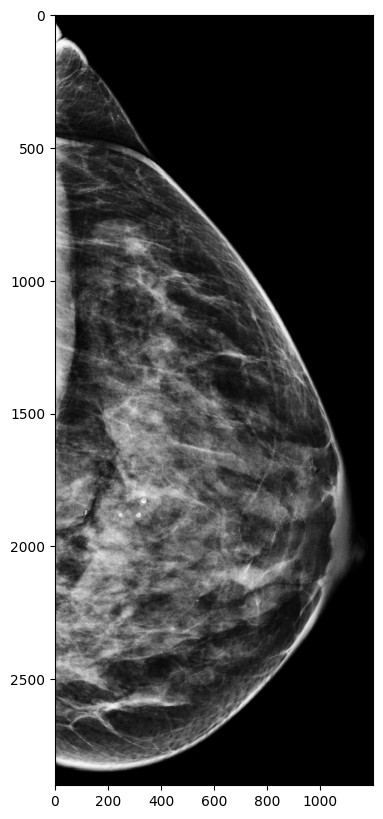

In [63]:
plt.figure(figsize=(18,10))
plt.imshow(mamo_1, cmap='gray')

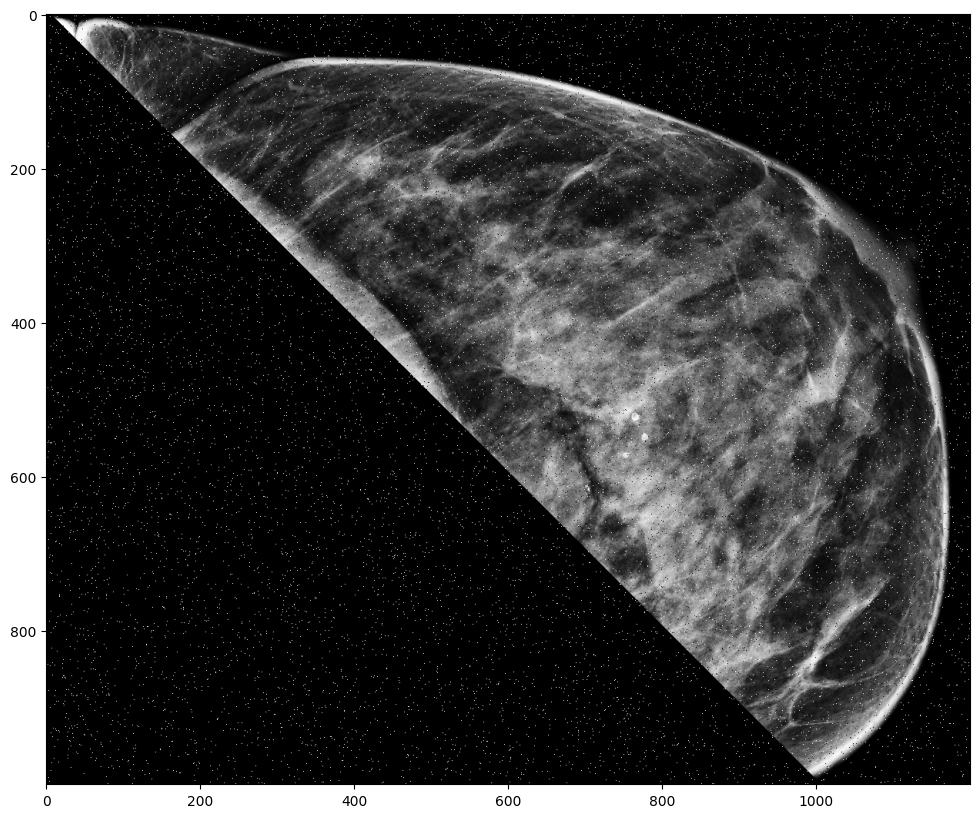

In [64]:
plt.figure(figsize=(18,10))
plt.imshow(mamo_2, cmap='gray')

Parecieran ser la misma imagen orginal con algunas diferencias: <br>
1- mamo_2 tiene un ruido mayor, sal y pimienta (hay puntitos negros que se aprecian apenas contra el fondo blanco) <br>
2- Mamo_2 es mas grande... pero es solo porque está rotada sin perdida de información?
3- De lo anterior, una parece ser la otra rotada.


# 2) Adecuamos la segunda imagen


Eliminemos el ruido. Como hay tanto ruido de sal como de pimienta, usamos el filtro de la mediana:


Tamaño de la máscara: 3


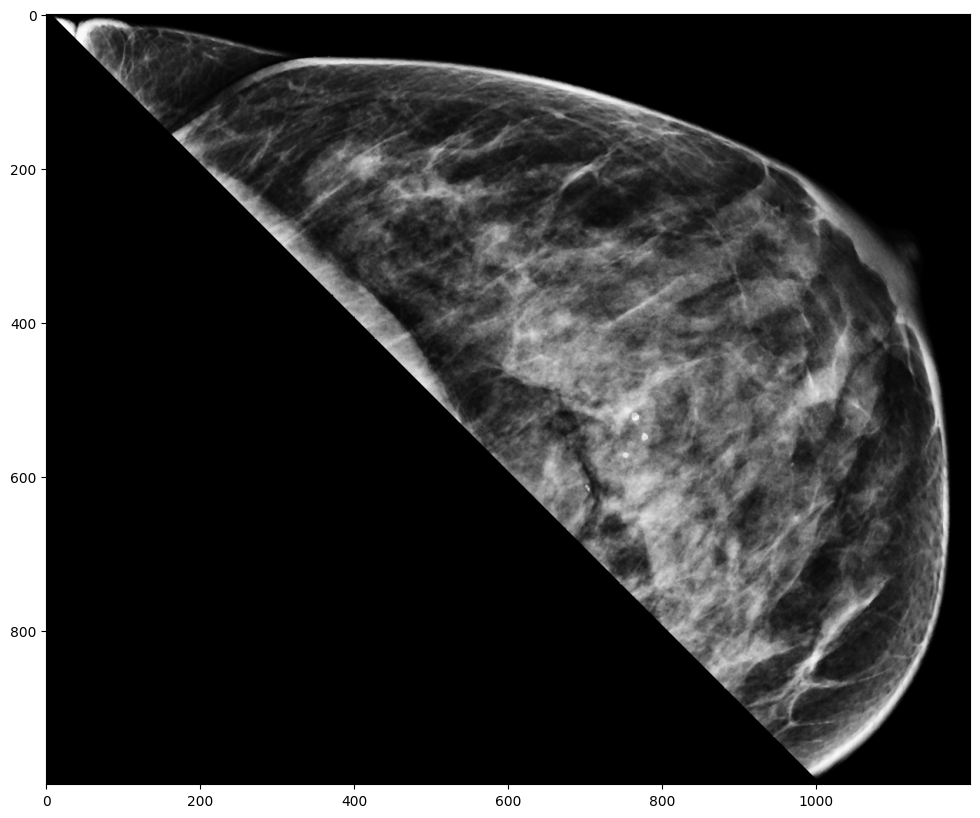

In [73]:
n= int(input('Ingrese el tamaño de la máscara (n): '))

mamo_2_filtered = cv2.medianBlur(mamo_2, n)

print(f'Tamaño de la máscara: {n}')
plt.figure(figsize=(18,10))
plt.imshow(mamo_2_filtered, cmap='gray')

Ahora llevemosla a la misma posición que mamo_1

In [66]:
from scipy.ndimage import rotate

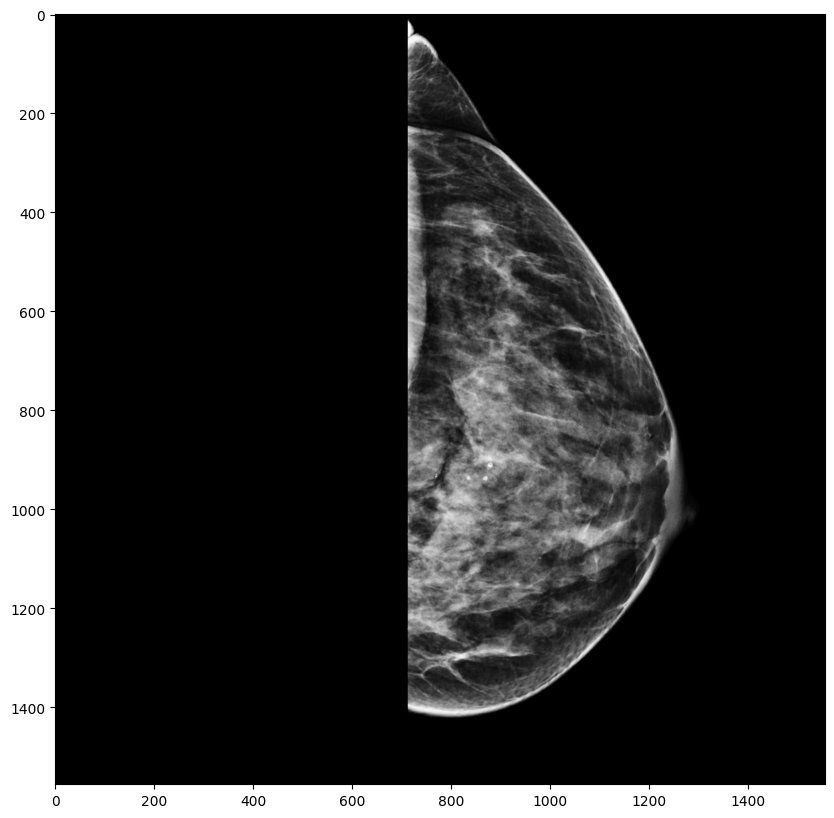

In [74]:
mamo_2_filtered_rotated = rotate(mamo_2_filtered,-45)
plt.figure(figsize=(18,10))
plt.imshow(mamo_2_filtered_rotated, cmap='gray')

Buscamos el primer pixel no negro con ayuda de chat gpt <br>
(Aun así, entendemos el código: son dos loops que buscan primero en una dimension -fijan y-, luego en la otra -x-, por un valor en la matriz distinto de cero, lo que delata un pixel no negro. El código solo corta el primer loop cuando podría cortar los dos, pero dado que el nested loop no corre más allá de un segundo, no hace falta hacer el esfuerzo de buscar una solución más prolija):

In [69]:
# Iterate through each row
for y in range(mamo_2_filtered_rotated.shape[0]):
    # Iterate through each pixel in the row
    #print(y)
    for x in range(mamo_2_filtered_rotated.shape[1]):
        # Check if the pixel is not black (assuming black is 0)
        #print(x)
        #print(mamo_2_filtered_rotated[y, x])
        if mamo_2_filtered_rotated[y, x] != 0:
            # Found the first non-black pixel in this row
            print("First non-black pixel in row {} is at column {}".format(y, x))
            break  # Exit the inner loop once found
    else:
        # If no non-black pixel is found in the row
        print("Row {} is all black".format(y))

Row 0 is all black
Row 1 is all black
Row 2 is all black
Row 3 is all black
Row 4 is all black
Row 5 is all black
Row 6 is all black
First non-black pixel in row 7 is at column 712
First non-black pixel in row 8 is at column 712
First non-black pixel in row 9 is at column 710
First non-black pixel in row 10 is at column 712
First non-black pixel in row 11 is at column 710
First non-black pixel in row 12 is at column 710
First non-black pixel in row 13 is at column 712
First non-black pixel in row 14 is at column 710
First non-black pixel in row 15 is at column 710
First non-black pixel in row 16 is at column 712
First non-black pixel in row 17 is at column 710
First non-black pixel in row 18 is at column 708
First non-black pixel in row 19 is at column 710
First non-black pixel in row 20 is at column 710
First non-black pixel in row 21 is at column 710
First non-black pixel in row 22 is at column 710
First non-black pixel in row 23 is at column 712
First non-black pixel in row 24 is at

Pareciera que a partir de la columna 712 "empieza" la imagen. Tomamos a partir de ahi:

In [70]:
mamo_2_filtered_rotated_cut = mamo_2_filtered_rotated[:,712:]

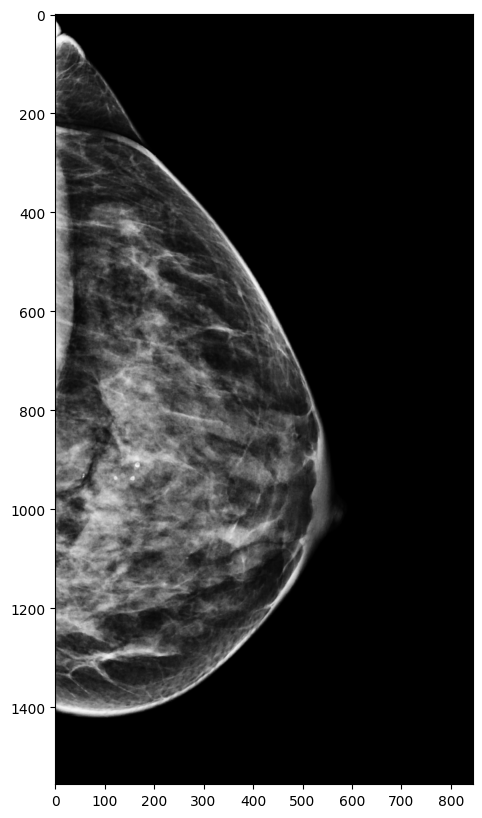

In [72]:
plt.figure(figsize=(18,10))
plt.imshow(mamo_2_filtered_rotated_cut, cmap='gray')

Si bien podríamos recortar al otro lado y un poco más abajo para que nos quede igual que la imagen mamo_1, ya las dimensiones en la gráfica nos dicen que mamo_1 es una imagen más grande. Podemos acondicionar ambas para que sean identicas, buscando en cada dirección cardinal el valor máximo de pixeles no negros y recortando allí.

In [76]:

image = mamo_2_filtered_rotated_cut

# Initialize variables to store maximum non-black column and row indices
max_non_black_column = -1
max_non_black_row = -1

# Iterate through each row
for y in range(image.shape[0]):
    # Iterate through each pixel in the row
    for x in range(image.shape[1]):
        # Check if the pixel is not black (assuming black is 0)
        if image[y, x] != 0:
            # Update max_non_black_column if necessary
            if x > max_non_black_column:
                max_non_black_column = x
            # Update max_non_black_row if necessary
            if y > max_non_black_row:
                max_non_black_row = y

# Print the maximum non-black column and row indices
print("Maximum non-black column index:", max_non_black_column)
print("Maximum non-black row index:", max_non_black_row)


Maximum non-black column index: 590
Maximum non-black row index: 1424


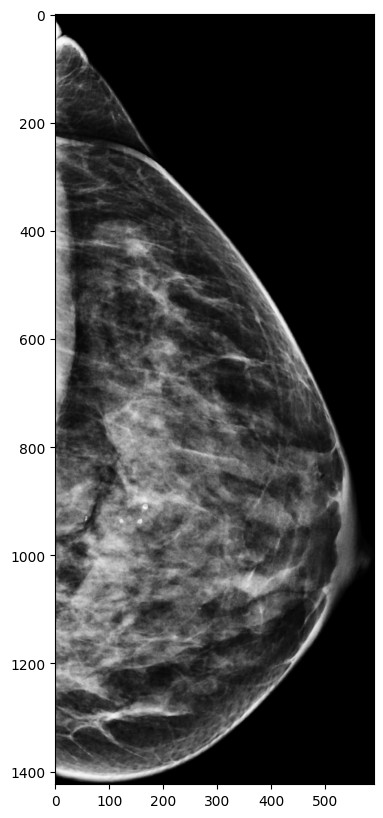

In [77]:
mamo_2_filtered_rotated_cut_trim = mamo_2_filtered_rotated_cut[:1424,:590]

plt.figure(figsize=(18,10))
plt.imshow(mamo_2_filtered_rotated_cut_trim, cmap='gray')

Hacemos lo mismo con la imagen 1

In [78]:

image = mamo_1

# Initialize variables to store maximum non-black column and row indices
max_non_black_column = -1
max_non_black_row = -1

# Iterate through each row
for y in range(image.shape[0]):
    # Iterate through each pixel in the row
    for x in range(image.shape[1]):
        # Check if the pixel is not black (assuming black is 0)
        if image[y, x] != 0:
            # Update max_non_black_column if necessary
            if x > max_non_black_column:
                max_non_black_column = x
            # Update max_non_black_row if necessary
            if y > max_non_black_row:
                max_non_black_row = y

# Print the maximum non-black column and row indices
print("Maximum non-black column index:", max_non_black_column)
print("Maximum non-black row index:", max_non_black_row)


Maximum non-black column index: 1183
Maximum non-black row index: 2855


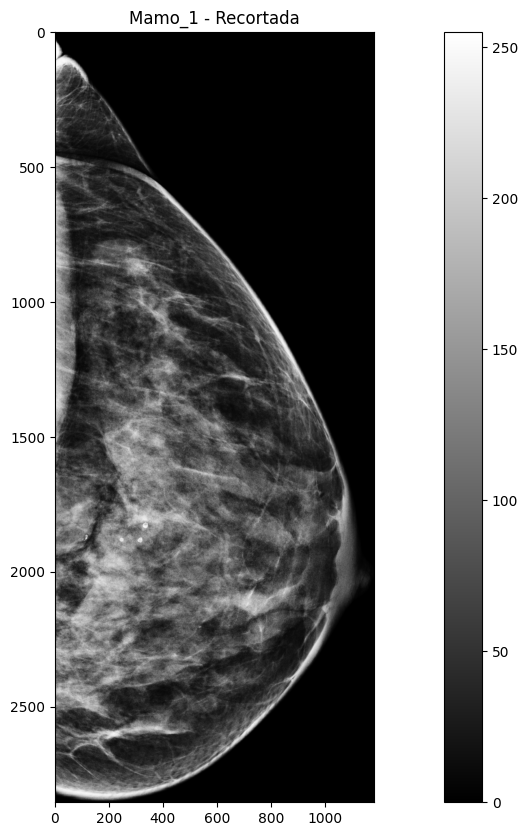

In [102]:
mamo_1_trim = mamo_1[:2855,:1183]

plt.figure(figsize=(18,10))
plt.imshow(mamo_1_trim, cmap='gray')
plt.title('Mamo_1 - Recortada')
plt.colorbar()

Observemos sus tamaños:

In [80]:
print('mamo_1 size:', mamo_1_trim.shape)
print('mamo_2 size:',mamo_2_filtered_rotated_cut_trim.shape)

mamo_1 size: (2855, 1183)
mamo_2 size: (1424, 590)


Y claramente una es mucho más grande que la otra. Si quisieramos compararlas punto a punto, deberiamos achicar la mas grande (perderiamos info) o agrandar la mas chica (que nos implicarìa interpolar -inventarnos- los puntos que faltan). Optamos por la segunda porque no implica pérdida de información.

mamo_2 size: (2855, 1183)


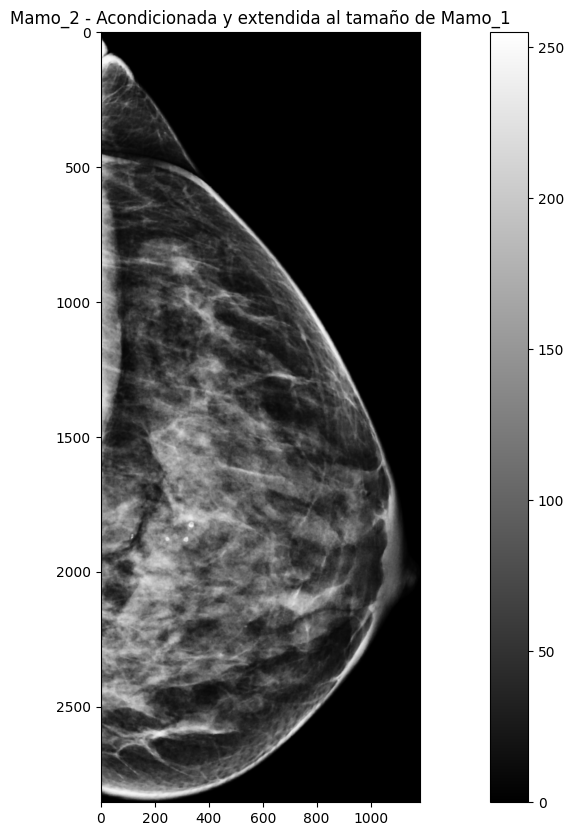

In [103]:
mamo_1_size = (1183,2855)
mamo_2_resized = cv2.resize(mamo_2_filtered_rotated_cut_trim,mamo_1_size)

plt.figure(figsize=(18,10))
plt.imshow(mamo_2_resized, cmap='gray')
plt.title('Mamo_2 - Acondicionada y extendida al tamaño de Mamo_1')
plt.colorbar()
print('mamo_2 size:',mamo_2_resized.shape)

Esto nos deja dos versiones finales de cada imagen:

In [84]:
mamo_1_final = mamo_1_trim
mamo_2_final = mamo_2_resized

# 3) construimos una imagen RGB que tenga las tres capas pedidas

### Buscamos bordes:

uint8 0
uint8 0
uint8 0


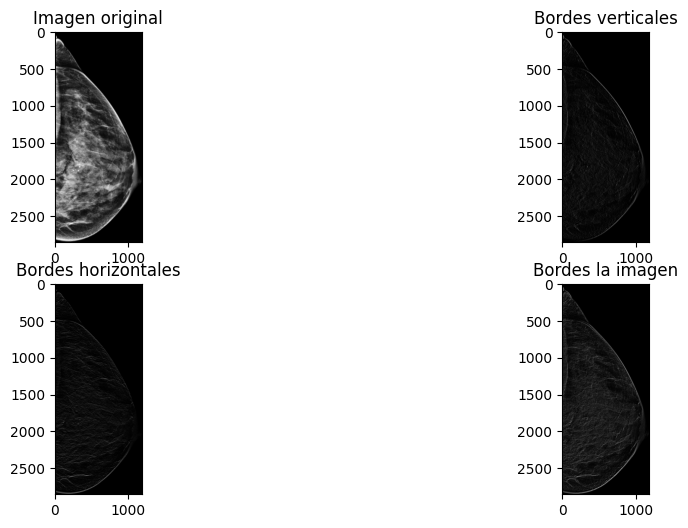

In [85]:
#Para bordes Verticales:
KPV=   np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
#Para Bordes Horizontales
KPH= np.transpose(KPV)    

I = mamo_1_final.copy()

OP_v=cv2.filter2D(I, -1, KPV  )   # Busca bordes verticales de la imagen.
OP_h=cv2.filter2D(I, -1,  KPH  )    #Bordes horizontales de la imagen
print(OP_v.dtype,OP_v[20,20])
print(OP_h.dtype,OP_h[20,20])

Bordes= OP_v+OP_h  

print(Bordes.dtype,Bordes[20,20])

fig = plt.gcf()
fig.set_size_inches(12,6)
plt.subplot(221),plt.imshow(I,cmap='gray'),plt.title('Imagen original')
plt.subplot(222),plt.imshow(OP_v,cmap='gray'),plt.title('Bordes verticales')
plt.subplot(223),plt.imshow(OP_h,cmap='gray'),plt.title('Bordes horizontales')
plt.subplot(224),plt.imshow(Bordes,cmap='gray'),plt.title('Bordes la imagen')
#plt.colorbar()
plt.show()


### Creamos imagen con capa RGB definidas en el punto 3

In [109]:
imagen_capas = np.zeros((2855, 1183, 3))
imagen_capas[:,:,0] = mamo_2_final[:,:]       #B imagen acondicionada a la capa azul
imagen_capas[:,:,1] = mamo_1_final[:,:]       #G imagen de referencia a la capa verde
imagen_capas[:,:,2] = Bordes[:,:]             #R bordes a la capa roja

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: title={'center': 'Imagen combinada'}>,
 Text(0.5, 1.0, 'Imagen combinada'))

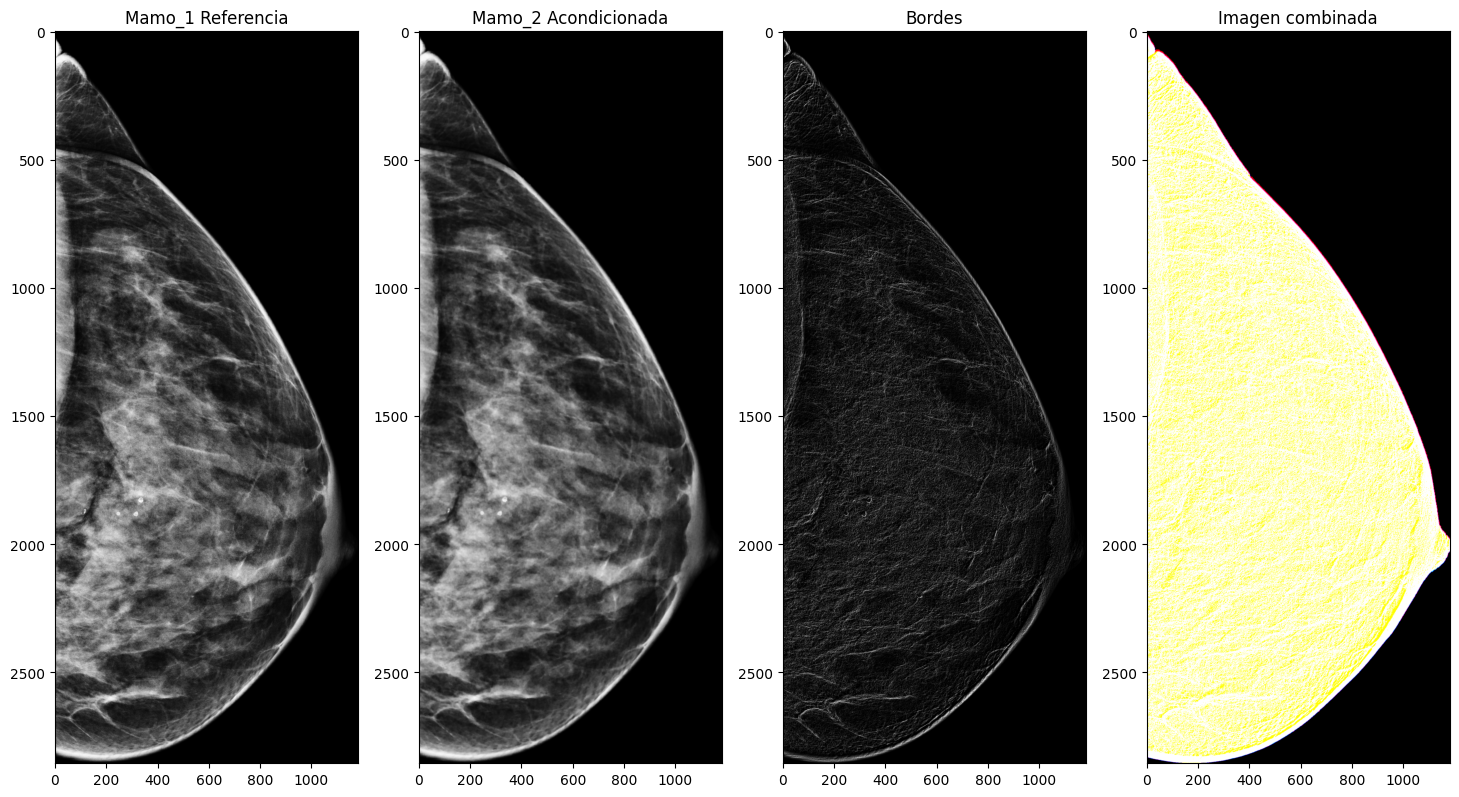

In [115]:
plt.figure(figsize=(18,10))
plt.subplot(141), plt.imshow(imagen_capas[:,:,1], cmap='gray'), plt.title('Mamo_1 Referencia')
plt.subplot(142), plt.imshow(imagen_capas[:,:,0], cmap='gray'), plt.title('Mamo_2 Acondicionada')
plt.subplot(143), plt.imshow(imagen_capas[:,:,2], cmap='gray'), plt.title('Bordes')
plt.subplot(144), plt.imshow(imagen_capas, ), plt.title('Imagen combinada')

# 4) cotejo punto a punto e imagen diferencia:

Obtenemos la imagen diferencia (absoluta) de Mamo_1 y Mamo_2 <br>

Pasamos las imagenes a float64 para tener una resta correcta

In [161]:
mamo_1_final_float = mamo_1_final.astype(np.float64)
mamo_2_final_float = mamo_2_final.astype(np.float64)

(<matplotlib.image.AxesImage at 0x14b7e7ce0>,
 Text(0.5, 1.0, 'Imagen Diferencia'))

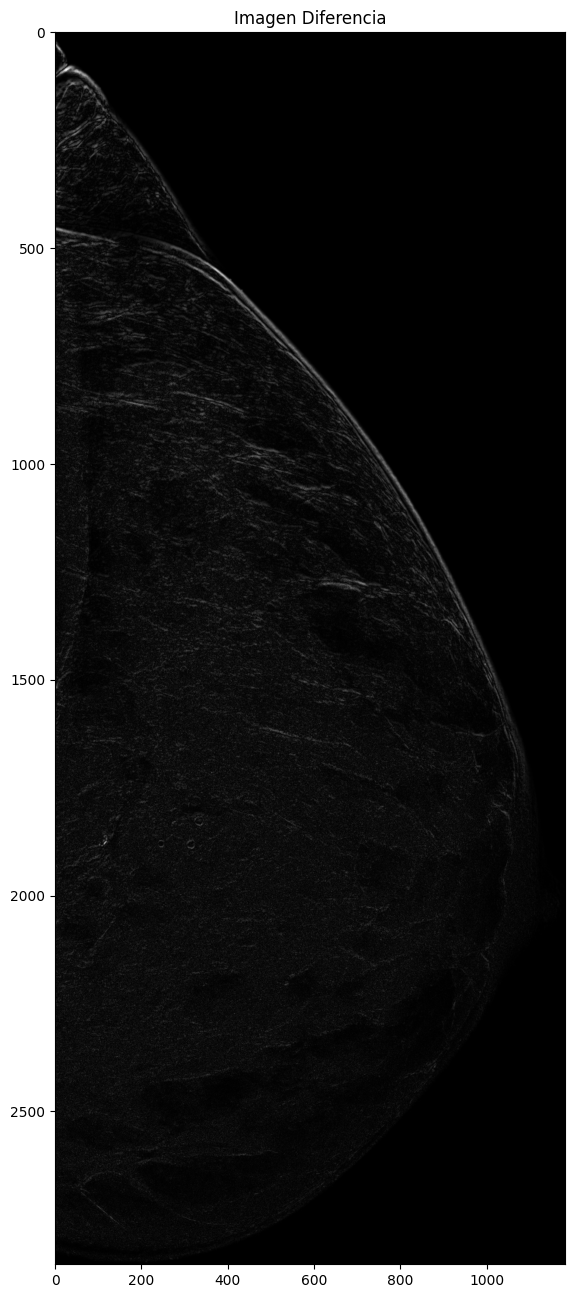

In [173]:
imagen_diferencia = np.abs(mamo_1_final_float - mamo_2_final_float)

imagen_diferencia = imagen_diferencia.astype('uint8') #volvemos a uint8

plt.figure(figsize=(24,16))
plt.imshow(imagen_diferencia, cmap='gray'), plt.title('Imagen Diferencia')

Analicemos un poco la distribución de pixeles y el colorbar:

(Text(0, 0.5, 'Cantidad de Píxeles'),
 Text(0.5, 1.0, 'Histograma de opencv con plot'))

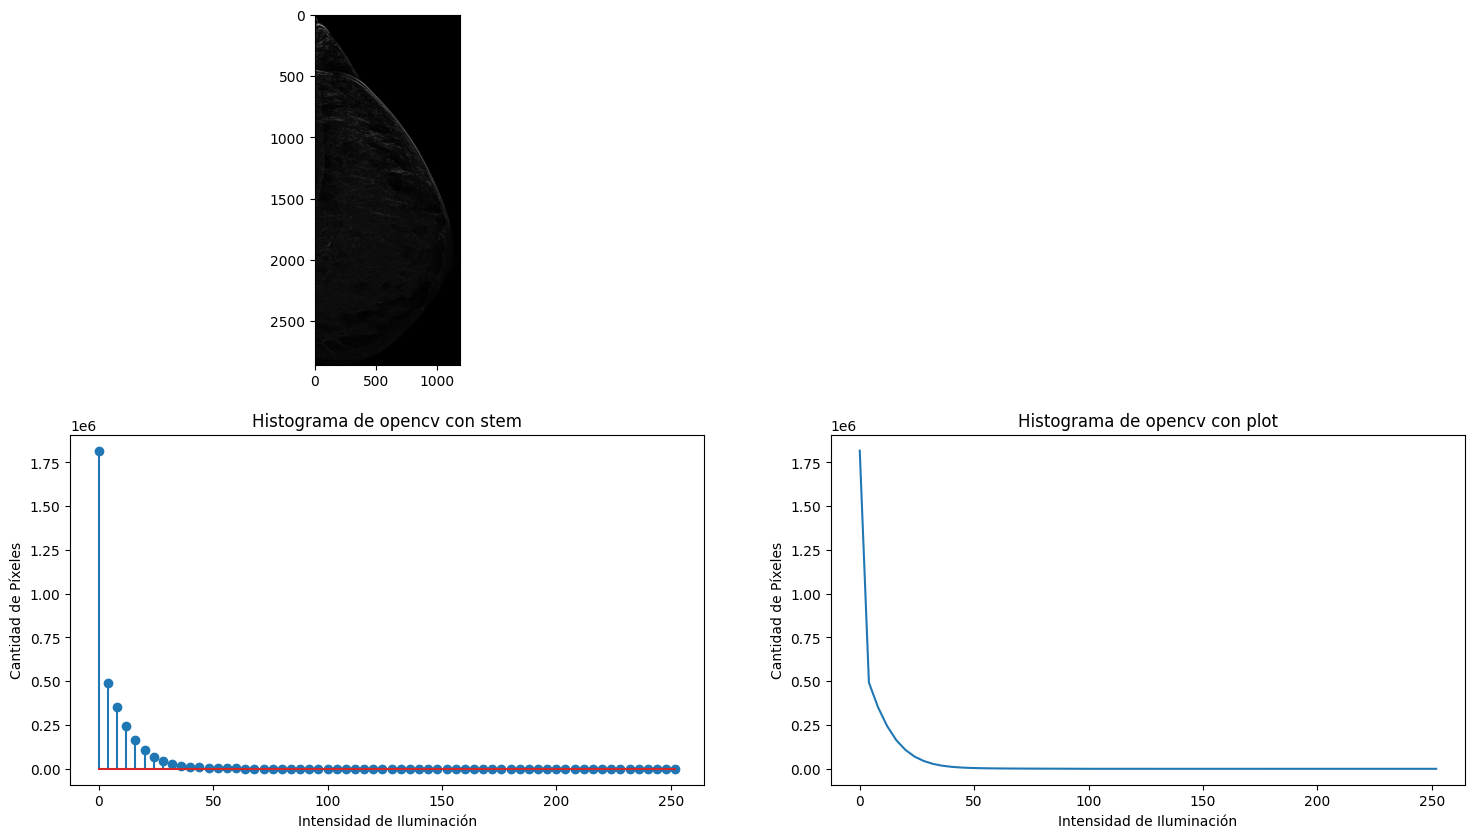

In [174]:
histsize=64
histrange=[0,256]

hist = cv2.calcHist([imagen_diferencia.astype('uint8')],[0],None,[histsize],histrange)  # OBS!!! Debemos pasarlo como uint8!!

paso=int((histrange[1]-histrange[0])/histsize)
plt.figure(figsize=(18,10))
plt.subplot(221),plt.imshow(imagen_diferencia, cmap='gray')
plt.subplot(223),plt.stem(range(histrange[0],histrange[1],paso),hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con stem')
plt.subplot(224),plt.plot(np.arange(histrange[0],histrange[1],paso),hist)
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles"), plt.title('Histograma de opencv con plot')

Una distribución aceptable:las mayores diferencias son menos probables, las imagenes aunque no son iguales, no están tan lejos.

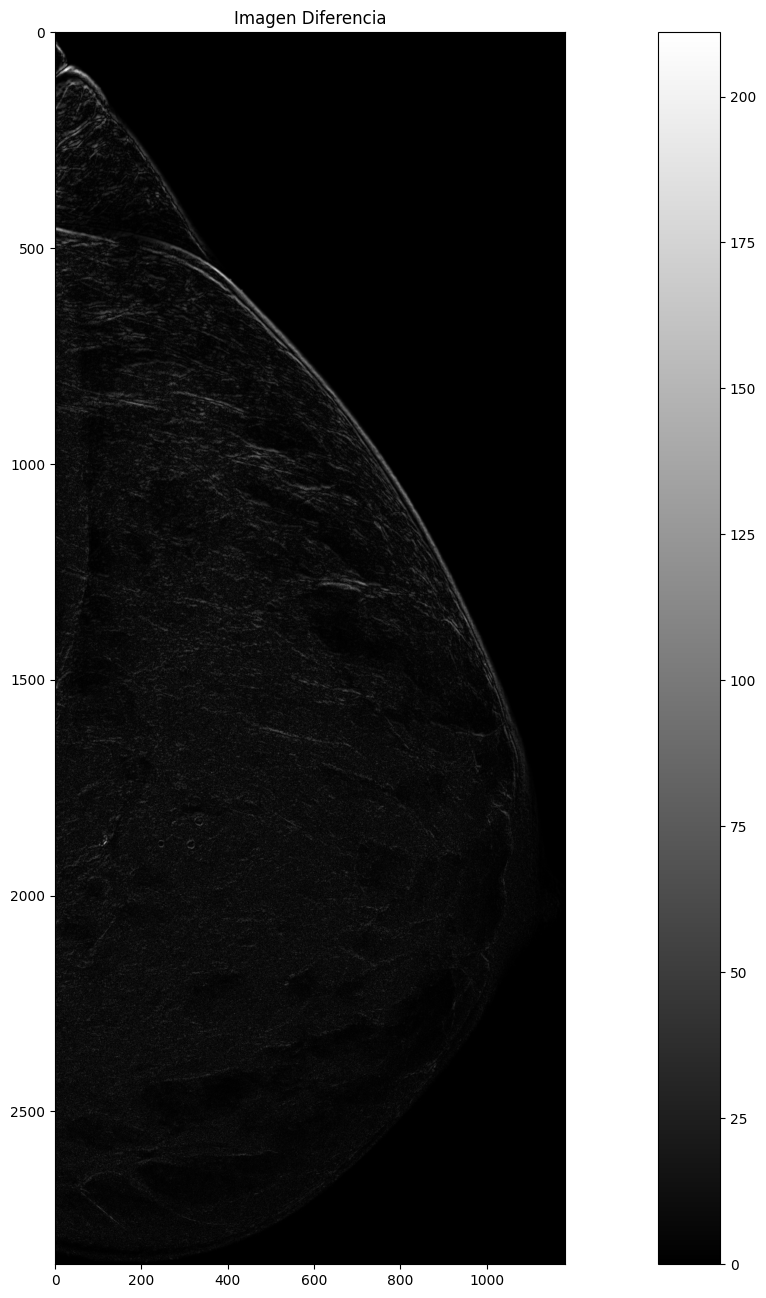

In [175]:
plt.figure(figsize=(24,16))
plt.imshow(imagen_diferencia, cmap='gray'), plt.title('Imagen Diferencia')
plt.colorbar()

# Observaciones Finales

1) Las diferencias que persisten en la imagen diferencia -los pixeles no negros- son diferencias entre la imagen referencia y la acondicionada. Cabria preguntarse si, en vez de agrandar la mas pequeña, hubiesemos achicado la mas grande, la diferencia seria menor. Quiza si, dado que al agrandar la imagen "inventamos" pixeles por medio de una interpolación.

2) Sin embargo, la segunda imagen tenia ruido y fue acondicionada a traves del filtro de la madiana, que dificilmente nos hubiese devuelto la imagen original sin ruido.

3) Observamos que la mayor diferencia entre las imagenes se da en el borde superior de la mama, donde la imagen reacondicionada seguramente haya perdido información, nitidez, al momento de ser filtrada y expandida. No pareciera deberse a que usamos las matrices combinada para obtener bordes verticales y horizontales, porque no tiene el mismo comportamiento en el borde de abajo.

